<a href="https://colab.research.google.com/github/Kush-Singh-26/Learning-Pytorch/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

In [3]:
train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, transform=transform, download=True
)
test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, transform=transform, download=True
)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 491kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.88MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.78MB/s]


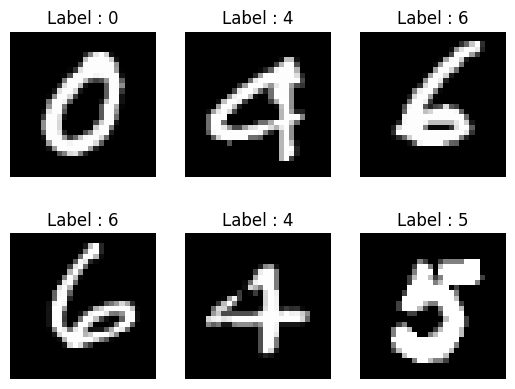

In [4]:
examples = iter(train_loader) # converts DataLoader into an iterator
images, labels = next(examples) # Get the next batch of images and labels

for i in range(6):
    plt.subplot(2, 3, i+1)  # creates a 2-row, 3-column grid layout for plotting.
    plt.imshow(images[i][0], cmap = 'gray')
    plt.title(f'Label : {labels[i].item()}')  # extracts the numeric label for the image.
    plt.axis('off')     # removes the axis
plt.show()

In [5]:
class MLP(nn.Module):
    def __init__(self, input_size = 28*28, hidden_size1 = 128, hidden_size2 = 64, output_size = 10): # initializes the network architecture.
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1) # First hidden layer / Input layer
        self.relu1 = nn.ReLU() # activation func. for first layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size2) # Second hidden layer
        self.relu2 = nn.ReLU() # activation func. for second layer
        self.fc3 = nn.Linear(hidden_size2, output_size) # Output layer

    def forward(self, x):   #  defines how the input data flows through the network.
        x = x.view(x.size(0), -1) # Flatten 28x28 image into 784-dim vector
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

In [6]:
criterion = nn.CrossEntropyLoss()

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)

In [8]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
num_epoch = 20

for epoch in range(num_epoch):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward() # backpropagation
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epoch}], Loss: {loss.item():.4f}")

Epoch [1/20], Loss: 0.2281
Epoch [2/20], Loss: 0.1154
Epoch [3/20], Loss: 0.0731
Epoch [4/20], Loss: 0.1626
Epoch [5/20], Loss: 0.1766
Epoch [6/20], Loss: 0.0198
Epoch [7/20], Loss: 0.1343
Epoch [8/20], Loss: 0.0200
Epoch [9/20], Loss: 0.2630
Epoch [10/20], Loss: 0.0630
Epoch [11/20], Loss: 0.0860
Epoch [12/20], Loss: 0.0511
Epoch [13/20], Loss: 0.0213
Epoch [14/20], Loss: 0.0059
Epoch [15/20], Loss: 0.0439
Epoch [16/20], Loss: 0.0097
Epoch [17/20], Loss: 0.0158
Epoch [18/20], Loss: 0.0010
Epoch [19/20], Loss: 0.0029
Epoch [20/20], Loss: 0.0232


In [10]:
correct = 0
total = 0

with torch.no_grad(): # disable gradient computation
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        # Get predicted class (highest probability)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')

Accuracy: 97.33%


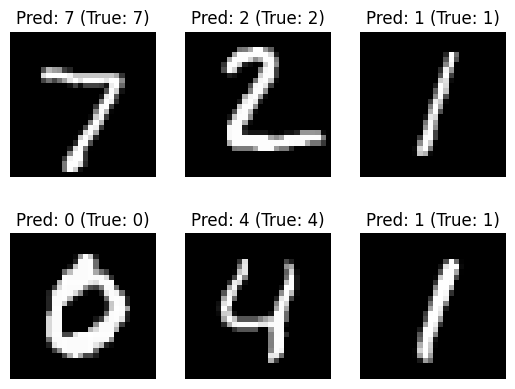

In [11]:
examples = iter(test_loader)
images, labels = next(examples)

with torch.no_grad():
    outputs = model(images.to(device))
_, predictions = torch.max(outputs, 1)

# Plot first 6 test images
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f'Pred: {predictions[i].item()} (True: {labels[i].item()})')
    plt.axis('off')
plt.show()

In [12]:
torch.save(model.state_dict(), "mnist_mlp.pth")
